<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_3/Assignment_3/Zachariah_Freitas_Assignment_3.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3.1
Zachariah Freitas

## Import Libraries

In [6]:
# Import Libraries
%matplotlib inline
import os
from IPython.display import display
import numpy as np
import pandas as pd 

# Turn off warnings to make results look cleaner.
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.gridspec as gs
import seaborn as sns; sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Drum Dataset
These data are in drum_data.csv. These are the spectrum (frequencies) of sounds from a digital drum musical instrument. The task is to identify which type of drum produced the sound.


In [7]:
# Get data
d_df = pd.read_csv('https://raw.githubusercontent.com/zachfreitas/ADS_504_Machine_Learning/main/Module_3/Assignment_3/drum_data.csv')

d_df.head(3).T

,0,1,2
Unnamed: 0,0,1,2
filename,70Funk.wav,8oh8 Rim.wav,8oh8 Tin.wav
label_text,snare,snare,snare
label,0,0,0
0.00 hz,0.117469,0.003148,0.006759
...,...,...,...
10680.47 hz,0.000041,0.000036,0.000024
10766.60 hz,0.000003,0.000006,0.000003
10852.73 hz,0.000001,0.000001,0.000001
10938.87 hz,0.0,0.0,0.0


In [8]:
d_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,212.0,1.055000e+02,6.134330e+01,0.000000e+00,5.275000e+01,1.055000e+02,1.582500e+02,2.110000e+02
label,212.0,4.481132e-01,4.984775e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
0.00 hz,212.0,3.624958e+00,6.942545e+00,1.526861e-03,6.484030e-02,4.884105e-01,4.309501e+00,6.658286e+01
86.13 hz,212.0,1.741696e+01,2.643852e+01,9.484890e-04,2.177118e-01,3.617768e+00,2.433454e+01,1.900677e+02
172.27 hz,212.0,8.596787e+00,9.235777e+00,3.451092e-03,2.332045e+00,6.081414e+00,1.131237e+01,5.620369e+01
...,...,...,...,...,...,...,...,...
10680.47 hz,212.0,1.519868e-05,3.001521e-05,8.123556e-10,1.042592e-07,3.744049e-06,1.851275e-05,2.575438e-04
10766.60 hz,212.0,3.533626e-06,6.106023e-06,3.550325e-10,1.984290e-08,9.070992e-07,4.349353e-06,4.113468e-05
10852.73 hz,212.0,6.712768e-07,1.313119e-06,8.939242e-11,3.470632e-09,1.677709e-07,7.235192e-07,9.834714e-06
10938.87 hz,212.0,9.091606e-08,1.898266e-07,8.800568e-12,4.616096e-10,1.739184e-08,9.673274e-08,1.392894e-06


In [9]:
pd.value_counts(d_df['label_text'])

snare    117
kick      95
Name: label_text, dtype: int64

In [10]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Columns: 133 entries, Unnamed: 0 to 11025.00 hz
dtypes: float64(129), int64(2), object(2)
memory usage: 220.4+ KB


In [11]:
d_df.isnull().sum()

Unnamed: 0     0
filename       0
label_text     0
label          0
0.00 hz        0
              ..
10680.47 hz    0
10766.60 hz    0
10852.73 hz    0
10938.87 hz    0
11025.00 hz    0
Length: 133, dtype: int64

In [12]:
# Nice Pair Grid
# Too many Variables to plot.
# sns.pairplot(d_df, hue="label_text", corner=True, kind='reg')

**Data Engeneering**

In [13]:
# Create the decision tree here Randomstate=42 80% training and 20% testing
X = d_df.drop(['Unnamed: 0','filename','label_text','label'], axis=1)
le = preprocessing.LabelEncoder()
labels = d_df['label_text']
le.fit(labels)
y=le.transform(labels)

# Split the dataset using the following line:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [22]:
# Review X Split
print('X Train:',X_train.shape,'X Test:',X_test.shape)
pct = round((X_test.shape[0]/((X_train.shape[0] +X_test.shape[0]) * 1.0))*100,0)
print('{} rows and {} columns for the train against {} rows ({}%) and {} columns for the test.'.format(X_train.shape[0],X_train.shape[1],X_test.shape[0],pct,X_test.shape[1]))

X Train: (190, 129) X Test: (22, 129)
190 rows and 129 columns for the train against 22 rows (10.0%) and 129 columns for the test.


In [23]:
# Review Y Split
print('Y Train:',y_train.shape,'Y Test:',y_test.shape)
pct = round((y_test.shape[0]/((y_train.shape[0] +y_test.shape[0]) * 1.0))*100,0)
print('{} rows for the train against {} rows ({}%) for the test, to the targets.'.format(y_train.shape[0], y_test.shape[0],pct))

Y Train: (190,) Y Test: (22,)
190 rows for the train against 22 rows (10.0%) for the test, to the targets.


**Trainning the KNN algorithm**

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.score(X_test,y_test)

0.9545454545454546

**Predicting with the Test Data and the KNN Algorithm**

In [28]:
results = knn.predict(X_test)

**Validation**

Cross Tabulation

In [29]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted  0   1  total
Real                   
0          9   1     10
1          0  12     12
total      9  13     22


In [36]:
# Let's see the confusion matrix together
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(results))
labels= le.inverse_transform(knn.classes_)
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results.T)

,kick,snare
kick,9,0
snare,1,12


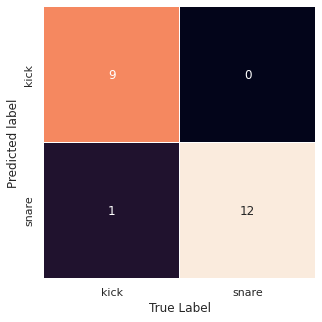

In [37]:
# Visualize the confusion matirx.
def visualize_confusion_matirx(model, y_test, y_pred, ax=None, cmap=None):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns; sns.set()
  labels = model.classes_  # Get the unique labels in the model.
  mat = confusion_matrix(y_test, y_pred, labels=labels)
  cm_array_df = pd.DataFrame(mat, 
                             index=le.inverse_transform(labels), 
                             columns=le.inverse_transform(labels))
  plt.figure(1, figsize=[5,5])
  ax = sns.heatmap(cm_array_df.T, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, cmap=cmap, ax=ax)
  ax.set(ylabel="Predicted label", xlabel="True Label")
  plt.show(ax);


visualize_confusion_matirx(knn, y_test, results)

**Classification Metrics**

In [35]:
# Classification Performance Metrics
from sklearn import metrics
target_names = le.inverse_transform(knn.classes_) # This is necessary due to the data transformation above.
print(metrics.classification_report(y_test, results, target_names=target_names))

              precision    recall  f1-score   support

        kick       1.00      0.90      0.95        10
       snare       0.92      1.00      0.96        12

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



**Cross Validation**

In [39]:
from sklearn.model_selection import cross_val_score
var="%", print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100), var[0])

NameError: ignored

In [42]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores

array([0.95348837, 1.        , 0.97619048, 0.95238095, 0.97619048])

In [43]:
var="%", print("Accuracy for Cross Validation: %0.1f" % (scores.mean()*100),var[0],"(+/- %0.1f)" % (scores.std() * 100), var[0])

NameError: ignored

In [52]:
# Create a list range
k_list = list(range(1,10,2))
# Create a dictionary
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 3, 5, 7, 9]])


In [54]:
# Create hyperparameter search grid
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')
# Run KNN with hyperparameter search grid
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]}, scoring='accuracy')

In [55]:
# Check the scores
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017157,0.005522,0.015134,0.001653,1,{'n_neighbors': 1},0.973684,1.000000,0.973684,0.973684,0.947368,0.973684,0.016644,2
1,0.014717,0.003710,0.021408,0.007294,3,{'n_neighbors': 3},0.973684,0.973684,0.973684,1.000000,0.947368,0.973684,0.016644,3
2,0.006291,0.002113,0.008642,0.001306,5,{'n_neighbors': 5},0.973684,1.000000,0.973684,1.000000,0.947368,0.978947,0.019693,1
3,0.007766,0.003321,0.015143,0.004577,7,{'n_neighbors': 7},0.973684,0.973684,0.973684,1.000000,0.947368,0.973684,0.016644,3
4,0.011921,0.003699,0.015067,0.001855,9,{'n_neighbors': 9},0.973684,0.973684,0.973684,1.000000,0.947368,0.973684,0.016644,3


In [56]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [58]:
# Show k with best Accuracy Results
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
2,{'n_neighbors': 5},0.978947,0.019693,1


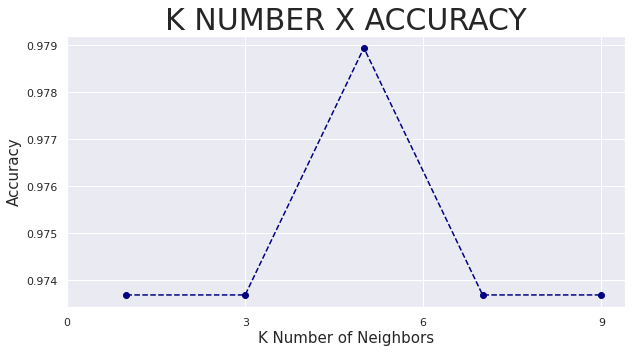

In [60]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,10,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

## Text Data
These data are in count_hamilton.csv. These data are the word counts of the Federalist papers, important documents in American history which have disputed authorship. The task is to identify the author of these documents.

In [ ]:
# Get data


t_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_3/Assignment_3/count_hamilton.csv')

t_df.head(3).T

,0,1,2
Unnamed: 0,0,1,2
meta_author,hamilton,jay,jay
meta_title,general introduction for the independent journ...,concerning dangers from foreign force and infl...,the same subject continued concerning dangers ...
000,0,0,0
10,0,0,0
...,...,...,...
yourselves,0,0,0
zaleucus,0,0,0
zeal,3,0,0
zealand,0,0,0


In [ ]:
t_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,85.0,42.000000,24.681302,0.0,21.0,42.0,63.0,84.0
000,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
10,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
11,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
13,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
yourselves,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
zaleucus,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
zeal,85.0,0.305882,0.617667,0.0,0.0,0.0,0.0,3.0
zealand,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0


**Data Engineering**

In [ ]:
# Create the decision tree here Randomstate=42 90% training and 10% testing
X = t_df.drop(['Unnamed: 0','meta_author','meta_title'], axis=1)
le = preprocessing.LabelEncoder()
labels = t_df['meta_author']
le.fit(labels)
y=le.transform(labels)

# Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**Data Engineering**

In [ ]:
#Apply the model here
clf = DecisionTreeClassifier() #Create your model here
clf = clf.fit(X_train, y_train)   #Fit on training data
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

## Anaimal Data
These data are from an animal shelter. These are records of animals coming in for treatment, with a few characteristics of the animals and information on the outcome. The task is
to predict the outcome.

In [ ]:
# Get data
a_df = pd.read_csv('https://raw.githubusercontent.com/zachfreitas/ADS_504_Machine_Learning/main/Module_3/Assignment_3/shelter_data.csv')

a_df.head(3).T

,0,1,2
AnimalID,A671945,A656520,A686464
Name,Hambone,Emily,Pearce
DateTime,2014-02-12 18:22:00,2013-10-13 12:44:00,2015-01-31 12:28:00
OutcomeType,Return_to_owner,Euthanasia,Adoption
OutcomeSubtype,NaN,Suffering,Foster
AnimalType,Dog,Cat,Dog
SexuponOutcome,Neutered Male,Spayed Female,Neutered Male
AgeuponOutcome,1 year,1 year,2 years
Breed,Shetland Sheepdog Mix,Domestic Shorthair Mix,Pit Bull Mix
Color,Brown/White,Cream Tabby,Blue/White


In [ ]:
a_df.describe().T

,count,unique,top,freq
AnimalID,26729,26729,A671945,1
Name,19038,6374,Max,136
DateTime,26729,22918,2015-08-11 00:00:00,19
OutcomeType,26729,5,Adoption,10769
OutcomeSubtype,13117,16,Partner,7816
AnimalType,26729,2,Dog,15595
SexuponOutcome,26728,5,Neutered Male,9779
AgeuponOutcome,26711,44,1 year,3969
Breed,26729,1380,Domestic Shorthair Mix,8810
Color,26729,366,Black/White,2824


**Data Engineering**

In [ ]:
# this line drops any rows with missing data
cleaned_data = s_df.dropna()
# here we grab the data we want from pandas
X_data = cleaned_data[['AnimalType','SexuponOutcome','AgeuponOutcome']]
y_data = cleaned_data[['OutcomeType']]
enc = OrdinalEncoder()
enc.fit(X_data)
le = preprocessing.LabelEncoder()
le.fit(y_data)
data_categorical = pd.DataFrame(enc.transform(X_data),
columns=list(X_data))
X=data_categorical
y=le.transform(y_data)

# Without changing the random state, divide your data into 50% for test and 50% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#Apply the model here and get accuracy score.
short_tree = DecisionTreeClassifier(max_depth=3) #Create your model here
short_tree = short_tree.fit(X_train, y_train)   #Fit on training data
y_pred = short_tree.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

**Perceptron**

In [ ]:
# Perceptron row instance calculation
x_input = [0.1,0.5,0.2]
w_weights = [0.4,0.3,0.6]

threshold = 0.5

def step(weighted_sum):
  if weighted_sum > threshold:
    return 1
  else: 
    return 0

def perceptron():
    weighted_sum = 0
    for x,w in zip(x_input, w_weights):
      weighted_sum += x*w
      print(weighted_sum)
    return step(weighted_sum)

output = perceptron()
print("output: " + str(output))

0.04000000000000001
0.19
0.31
output: 0


In [ ]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.052)


In [ ]:
# make a prediction with a perceptron model on the dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


In [ ]:

# grid search total epochs for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron(eta0=0.0001)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Tune Perceptron Hyperparameters
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000] # Epochs: number of training epochs we typically use values on a log scale between 1 and 1e+4.
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0] # Learning Rate: It is common to test learning rates on a log scale between a small value such as 1e-4 (or smaller) and 1.0
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'eta0': 0.0001, 'max_iter': 10}
>0.850 with: {'eta0': 0.0001, 'max_iter': 1}
>0.857 with: {'eta0': 0.0001, 'max_iter': 10}
>0.857 with: {'eta0': 0.0001, 'max_iter': 100}
>0.857 with: {'eta0': 0.0001, 'max_iter': 1000}
>0.857 with: {'eta0': 0.0001, 'max_iter': 10000}
>0.850 with: {'eta0': 0.001, 'max_iter': 1}
>0.857 with: {'eta0': 0.001, 'max_iter': 10}
>0.857 with: {'eta0': 0.001, 'max_iter': 100}
>0.857 with: {'eta0': 0.001, 'max_iter': 1000}
>0.857 with: {'eta0': 0.001, 'max_iter': 10000}
>0.850 with: {'eta0': 0.01, 'max_iter': 1}
>0.846 with: {'eta0': 0.01, 'max_iter': 10}
>0.853 with: {'eta0': 0.01, 'max_iter': 100}
>0.853 with: {'eta0': 0.01, 'max_iter': 1000}
>0.853 with: {'eta0': 0.01, 'max_iter': 10000}
>0.850 with: {'eta0': 0.1, 'max_iter': 1}
>0.836 with: {'eta0': 0.1, 'max_iter': 10}
>0.847 with: {'eta0': 0.1, 'max_iter': 100}
>0.847 with: {'eta0': 0.1, 'max_iter': 1000}
>0.847 with: {'eta0': 0.1, 'max_iter': 10000}
>0.850 with: {'eta0': 1.0, '